In [26]:
import pandas as pd
import numpy as np
df=pd.read_excel("Datos.xlsx")

In [27]:
df

,Pedido,Valor pedido,Región consultora,Población del Municipio,Tiempo de entrega,Satisfacción
0,1,232700.0,Sur,4,5,No
1,2,289300.0,Sur,4,3,Si
2,3,358600.0,Norte,2,2,Si
3,4,188600.0,Centro,3,2,Si
4,5,317200.0,Sur,4,3,Si
...,...,...,...,...,...,...
1745,1746,237400.0,Centro,3,2,Si
1746,1747,273900.0,Centro,3,2,Si
1747,1748,219400.0,Centro,4,2,Si
1748,1749,199900.0,Centro,4,2,Si


Extraiga 50 muestras aleatorias de tamaño 30 de la variable valor del pedido y calcule 
la media por cada muestra.  Genere la distribución de datos con un histograma.  
Concluya al respecto. 

In [28]:
muestras = [np.random.choice(df["Valor pedido"], size=30, replace=False) for _ in range(50)]

In [29]:
medias_muestras = [np.mean(muestra) for muestra in muestras]

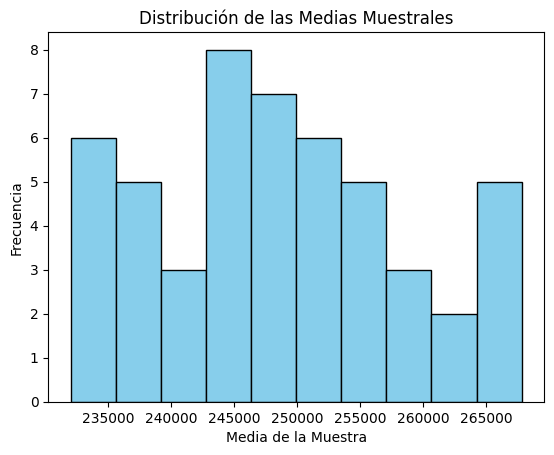

In [30]:
import matplotlib.pyplot as plt
plt.hist(medias_muestras, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de las Medias Muestrales')
plt.xlabel('Media de la Muestra')
plt.ylabel('Frecuencia')
plt.show()

In [1]:
from scipy.stats import norm
# Muestreo aletorio simple
def Tamaño_de_muestra_proporcion(Z,E,desviacion):
    Z=round(norm.ppf(Z),3)
    n=(Z**2*(desviacion**2))/(E**2)
    return n

In [33]:
df.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,1750.000000,1750.000000,1750.000000,1750.000000
mean,875.500000,248605.657143,2.840571,2.229714
std,505.325802,50294.015901,1.179809,0.952759
min,1.000000,62900.000000,1.000000,1.000000
25%,438.250000,214800.000000,2.000000,2.000000
50%,875.500000,248600.000000,3.000000,2.000000
75%,1312.750000,282000.000000,4.000000,3.000000
max,1750.000000,424400.000000,4.000000,5.000000


Muestreo Aleatorio Simple

El n calculado

In [38]:
Tamaño_de_muestra_proporcion(0.95,4000,50294.015901)

427.80361632054354

Muestra tomada de la base de datos segun la muestra calculada

In [39]:
muestra=df.sample(428)

In [40]:
muestra

,Pedido,Valor pedido,Región consultora,Población del Municipio,Tiempo de entrega,Satisfacción
757,758,159400.0,Norte,1,1,Si
1185,1186,259800.0,Sur,4,3,Si
1191,1192,260700.0,Sur,4,5,No
552,553,343600.0,Centro,3,2,Si
1349,1350,263800.0,Norte,2,2,Si
...,...,...,...,...,...,...
958,959,285000.0,Norte,2,2,Si
1265,1266,186000.0,Sur,4,3,Si
126,127,220400.0,Norte,1,1,Si
1161,1162,348500.0,Centro,4,3,Si


Analisis exploratorio de datos para la muestra aleatoria simple

In [42]:
muestra.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,428.000000,428.000000,428.000000,428.000000
mean,889.651869,249131.308411,2.897196,2.296729
std,504.688280,51985.438433,1.192754,1.000369
min,4.000000,62900.000000,1.000000,1.000000
25%,441.500000,216750.000000,2.000000,2.000000
50%,927.000000,251450.000000,3.000000,2.000000
75%,1333.500000,282075.000000,4.000000,3.000000
max,1747.000000,421400.000000,4.000000,5.000000


Proporciones de la muestra aleatoria simple

In [50]:
muestra["Región consultora"].value_counts(normalize=True)*100

Región consultora
Centro    35.981308
Sur       33.878505
Norte     30.140187
Name: proportion, dtype: float64

In [52]:
muestra["Tiempo de entrega"].value_counts(normalize=True)*100

Tiempo de entrega
2    38.084112
3    27.102804
1    23.130841
4     9.345794
5     2.336449
Name: proportion, dtype: float64

In [54]:
muestra["Satisfacción"].value_counts(normalize=True)*100

Satisfacción
Si    92.056075
No     7.943925
Name: proportion, dtype: float64

Muestreo Aleatorio Estratificado

1. Muestreo aleatorio simple a la base de datos

n_calculado--- 1118

In [65]:
Tamaño_de_muestra_proporcion(0.99,3500,50294.015901)

1117.1615028965311

2. Sacar muestra aletoria de la base de datos

In [66]:
muestra_estratificar=df.sample(1118)

Estratificar la muestra tomada

In [67]:
df_categoria_Sur = muestra_estratificar[muestra_estratificar['Región consultora'] == 'Sur']

In [71]:
df_categoria_Centro = muestra_estratificar[muestra_estratificar['Región consultora'] == 'Centro']

In [72]:
df_categoria_Norte = muestra_estratificar[muestra_estratificar['Región consultora'] == 'Norte']

In [73]:
df_categoria_Sur.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,313.000000,313.000000,313.0,313.000000
mean,896.460064,247463.578275,4.0,3.389776
std,493.514573,51851.060889,0.0,0.631561
min,1.000000,101600.000000,4.0,3.000000
25%,451.000000,213400.000000,4.0,3.000000
50%,917.000000,245800.000000,4.0,3.000000
75%,1282.000000,282400.000000,4.0,4.000000
max,1743.000000,421400.000000,4.0,5.000000


In [74]:
df_categoria_Centro.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,441.000000,441.000000,441.000000,441.000000
mean,890.464853,246862.585034,3.240363,2.111111
std,501.271392,49527.205395,0.501184,0.314627
min,4.000000,110600.000000,2.000000,2.000000
25%,459.000000,214800.000000,3.000000,2.000000
50%,904.000000,246200.000000,3.000000,2.000000
75%,1334.000000,279400.000000,4.000000,2.000000
max,1749.000000,382100.000000,4.000000,3.000000


In [75]:
df_categoria_Norte.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,364.000000,364.000000,364.000000,364.000000
mean,837.244505,249467.032967,1.326923,1.313187
std,510.501286,49810.413141,0.469735,0.464428
min,3.000000,102800.000000,1.000000,1.000000
25%,394.500000,218725.000000,1.000000,1.000000
50%,817.000000,249150.000000,1.000000,1.000000
75%,1306.500000,280150.000000,2.000000,2.000000
max,1742.000000,424400.000000,2.000000,2.000000


In [77]:
Muestra_estrato,desviaciones_estrato=[313,441,364],[51851.060889,49527.205395,49810.413141]

In [83]:
# Muestreo aletorio simple
def Tamaño_de_muestra_finita_proporcion(Z,desviacion,E,N):
    Z=round(norm.ppf(Z),3)
    numerador= (N * Z**2 * desviacion**2)
    denominador=(E**2 * (N - 1)) + (Z**2 * desviacion**2)
    n=numerador/denominador
    return n

In [84]:
import math
def Tamaño_de_muestra_proporcion_finita_desviacion(N_h,desviacion_h,Z,E,N):
    c=0
    desviacion=math.sqrt(sum([(N_h[i]-1)*(desviacion_h[i]**2) for i in range(len(N_h))])/(N-len(N_h)))
    n=round(Tamaño_de_muestra_finita_proporcion(Z,desviacion,E,N),1)
    print(n)
    while c < len(N_h):
        n_h=n*((N_h[c]*desviacion_h[c])/(np.dot(N_h,desviacion_h)))
        print(f" la muestra para el estrato {c+1} es {n_h}")
        c=c+1

In [85]:
Tamaño_de_muestra_proporcion_finita_desviacion(Muestra_estrato,desviaciones_estrato,0.99,3500,1118)

558.9
 la muestra para el estrato 1 es 161.39323529638307
 la muestra para el estrato 2 es 217.20296837986845
 la muestra para el estrato 3 es 180.3037963237485


Tomar una muestra de cada estrato

In [87]:
muestra_sur=df_categoria_Sur.sample(162)

In [89]:
muestra_centro=df_categoria_Centro.sample(218)

In [90]:
muestra_norte=df_categoria_Norte.sample(181)

In [91]:
muestra_sur.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,162.000000,162.000000,162.0,162.000000
mean,890.265432,249890.740741,4.0,3.388889
std,493.213922,52461.881821,0.0,0.623056
min,1.000000,101600.000000,4.0,3.000000
25%,466.000000,219425.000000,4.0,3.000000
50%,880.000000,250300.000000,4.0,3.000000
75%,1294.750000,284150.000000,4.0,4.000000
max,1729.000000,421400.000000,4.0,5.000000


In [92]:
muestra_centro.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,218.000000,218.000000,218.000000,218.000000
mean,891.532110,244631.192661,3.215596,2.077982
std,494.372498,52123.392587,0.493585,0.268760
min,8.000000,110600.000000,2.000000,2.000000
25%,504.500000,209725.000000,3.000000,2.000000
50%,902.500000,239300.000000,3.000000,2.000000
75%,1329.500000,279100.000000,3.750000,2.000000
max,1749.000000,379300.000000,4.000000,3.000000


In [93]:
muestra_norte.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,181.000000,181.000000,181.000000,181.000000
mean,840.497238,248249.171271,1.348066,1.337017
std,506.576391,48279.283133,0.477679,0.474002
min,9.000000,102800.000000,1.000000,1.000000
25%,384.000000,221100.000000,1.000000,1.000000
50%,829.000000,251400.000000,1.000000,1.000000
75%,1300.000000,279800.000000,2.000000,2.000000
max,1742.000000,397500.000000,2.000000,2.000000


Para el Valor de Pedido asuma un margen de error de $3500, con un Nivel de Confianza 
del 95% y con ello calcule la muestra total y por estrato4 a través de la asignación 
proporcional.

muestreo aletorio simple de la base de datos

In [94]:
Tamaño_de_muestra_proporcion(0.95,3500,50294.015901)

558.763907030914

In [95]:
muestra_estratificar_2=df.sample(559)

estratificar la primera muestra aleatoria

In [98]:
df_categoria_1 = muestra_estratificar_2[muestra_estratificar_2['Población del Municipio'] == 1]

In [100]:
df_categoria_1.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,127.000000,127.000000,127.0,127.0
mean,855.779528,251292.125984,1.0,1.0
std,516.802761,47617.929807,0.0,0.0
min,12.000000,129500.000000,1.0,1.0
25%,408.500000,221950.000000,1.0,1.0
50%,849.000000,258800.000000,1.0,1.0
75%,1256.000000,285450.000000,1.0,1.0
max,1734.000000,369500.000000,1.0,1.0


In [101]:
df_categoria_2 = muestra_estratificar_2[muestra_estratificar_2['Población del Municipio'] == 2]

In [102]:
df_categoria_2.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,59.000000,59.000000,59.0,59.000000
mean,855.169492,252566.101695,2.0,1.966102
std,507.890198,49379.625877,0.0,0.182521
min,9.000000,154900.000000,2.0,1.000000
25%,422.500000,218050.000000,2.0,2.000000
50%,929.000000,251800.000000,2.0,2.000000
75%,1333.000000,284950.000000,2.0,2.000000
max,1641.000000,365800.000000,2.0,2.000000


In [103]:
df_categoria_3 = muestra_estratificar_2[muestra_estratificar_2['Población del Municipio'] == 3]

In [104]:
df_categoria_3.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,136.000000,136.000000,136.0,136.0
mean,864.485294,256603.676471,3.0,2.0
std,503.162738,47517.364324,0.0,0.0
min,4.000000,111900.000000,3.0,2.0
25%,394.750000,230325.000000,3.0,2.0
50%,879.500000,254800.000000,3.0,2.0
75%,1286.750000,284200.000000,3.0,2.0
max,1744.000000,373000.000000,3.0,2.0


In [105]:
df_categoria_4 = muestra_estratificar_2[muestra_estratificar_2['Población del Municipio'] == 4]

In [106]:
df_categoria_4.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,237.000000,237.000000,237.0,237.000000
mean,863.265823,246883.966245,4.0,3.194093
std,501.104400,46992.225244,0.0,0.767650
min,5.000000,62900.000000,4.0,2.000000
25%,450.000000,216500.000000,4.0,3.000000
50%,847.000000,244500.000000,4.0,3.000000
75%,1297.000000,277600.000000,4.0,4.000000
max,1743.000000,362900.000000,4.0,5.000000


In [107]:
Muestra_estrato_2,desviaciones_estrato_2=[127,59,136,237],[47617.929807,49379.625877,47517.364324,46992.225244]

In [108]:
Tamaño_de_muestra_proporcion_finita_desviacion(Muestra_estrato_2,desviaciones_estrato_2,0.95,3500,559)

263.8
 la muestra para el estrato 1 es 60.06403589375219
 la muestra para el estrato 2 es 28.936105944835507
 la muestra para el estrato 3 es 64.18470223106827
 la muestra para el estrato 4 es 110.61515593034405


Sacar una muestra aleatoria por cada estrato

In [113]:
muestra_estrato_1=df_categoria_1.sample(61)

In [115]:
muestra_estrato_2=df_categoria_2.sample(29)

In [116]:
muestra_estrato_3=df_categoria_3.sample(65)

In [117]:
muestra_estrato_4=df_categoria_4.sample(111)

In [118]:
muestra_estrato_1.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,61.000000,61.000000,61.0,61.0
mean,851.327869,251198.360656,1.0,1.0
std,532.300001,46194.052618,0.0,0.0
min,26.000000,135000.000000,1.0,1.0
25%,398.000000,221600.000000,1.0,1.0
50%,861.000000,261500.000000,1.0,1.0
75%,1213.000000,284600.000000,1.0,1.0
max,1734.000000,336700.000000,1.0,1.0


In [119]:
muestra_estrato_2.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,29.000000,29.000000,29.0,29.000000
mean,799.310345,246162.068966,2.0,1.965517
std,472.119318,47661.098346,0.0,0.185695
min,100.000000,173500.000000,2.0,1.000000
25%,381.000000,216600.000000,2.0,2.000000
50%,840.000000,243800.000000,2.0,2.000000
75%,1076.000000,273500.000000,2.0,2.000000
max,1616.000000,360400.000000,2.0,2.000000


In [120]:
muestra_estrato_3.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,65.000000,65.000000,65.0,65.0
mean,918.938462,259310.769231,3.0,2.0
std,520.182446,48610.595948,0.0,0.0
min,21.000000,111900.000000,3.0,2.0
25%,394.000000,233200.000000,3.0,2.0
50%,1013.000000,258500.000000,3.0,2.0
75%,1375.000000,287400.000000,3.0,2.0
max,1733.000000,353300.000000,3.0,2.0


In [121]:
muestra_estrato_4.describe()

,Pedido,Valor pedido,Población del Municipio,Tiempo de entrega
count,111.000000,111.000000,111.0,111.000000
mean,880.117117,252823.423423,4.0,3.243243
std,494.321881,40314.829112,0.0,0.765343
min,5.000000,153800.000000,4.0,2.000000
25%,512.000000,224900.000000,4.0,3.000000
50%,828.000000,248500.000000,4.0,3.000000
75%,1302.500000,278850.000000,4.0,4.000000
max,1743.000000,335500.000000,4.0,5.000000


Intervalo de confianza MAS

X= Media muestral del valor del pedido,
 Z_alfa_medios=Esatdistico de prueba normal,
 alfa_medios=error tipo 1 a la mitad,
 desviacion=desviacion estandar poblacional,
 n=numero de muestra tomado,

In [2]:
from scipy.stats import norm
X_media_muestral=249131.308411
desviacion_poblacional=50294.015901
alfa=0.025
n=428
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 253896.1723255097
limite superior de la media muestral en el valor del pedido 244366.44449649032


Intervalo de confianza para el MAE , grupo Sur

In [3]:
X_media_muestral=249890.740741
desviacion_poblacional=50294.015901
alfa=0.01/2
n=162
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 260069.73023641133
limite superior de la media muestral en el valor del pedido 239711.75124558865


Intervalo de confianza para el MAE , grupo Centro

In [4]:
X_media_muestral=244631.192661
desviacion_poblacional=50294.015901
alfa=0.01/2
n=218
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 253405.9259871255
limite superior de la media muestral en el valor del pedido 235856.45933487453


Intervalo de confianza para el MAE , grupo Norte

In [5]:
X_media_muestral=249467.032967
desviacion_poblacional=50294.015901
alfa=0.01/2
n=181
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 259096.9575514584
limite superior de la media muestral en el valor del pedido 239837.1083825416


Intervalo de confianza para el MAE , grupo 1

In [6]:
X_media_muestral=251198.360656
desviacion_poblacional=50294.015901
alfa=0.05/2
n=61
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 263819.7588515086
limite superior de la media muestral en el valor del pedido 238576.9624604914


Intervalo de confianza para el MAE , grupo 2

In [7]:
X_media_muestral=246162.068966
desviacion_poblacional=50294.015901
alfa=0.05/2
n=29
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 264467.2229763957
limite superior de la media muestral en el valor del pedido 227856.9149556043


Intervalo de confianza para el MAE , grupo 3

In [8]:
X_media_muestral=259310.769231
desviacion_poblacional=50294.015901
alfa=0.05/2
n=65
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 271537.6508618637
limite superior de la media muestral en el valor del pedido 247083.8876001363


Intervalo de confianza para el MAE , grupo 4

In [9]:
X_media_muestral=252823.423423
desviacion_poblacional=50294.015901
alfa=0.05/2
n=111
Z=round(norm.ppf(alfa),3)
E=Z*(desviacion_poblacional/(n**0.5))
print("limite inferior de la media muestral en el valor del pedido",X_media_muestral-E)
print("limite superior de la media muestral en el valor del pedido",X_media_muestral+E)

limite inferior de la media muestral en el valor del pedido 262179.8690198637
limite superior de la media muestral en el valor del pedido 243466.97782613625
